# **NUMCS** 



### **Introduction:**

NumCS or Numerical Methods is widely used in todays research. From Physics, to simulation numerical evaluation is a vital task or sometimes even challenge.
Math is nice and on paper everything (that can be solved) has a set of rules, that when followed correctly calculate the correct solution. Integrals, Derivatives, Interpolation are some examples of such computations. But Mathematical Numbers as we know them, are not equiavalent to the set of Machine Numbers. There are rounding errors that can occur either via cancellation or via overflow/underflow when operating with Machine Numbers. The goal of this lecture is to efficiently and correctly implement vital Mathematical Concepts in the world of Machine Numbers. The language of the implementetion is Python and common package used throughout is the numpy package. 

### **Chapter 0 - Differentials**

An example where cancelletion can take place is when evaluating differentialquotient: 

 ![Cancelation](Images/Chapter0-Cancelation.png)

 The code below shows a convergance at the start but then the relative error starts growing.

In [3]:
from numpy import exp, sin, cos

f = exp; df = exp; x = 0
print(f.__name__, x)
h= 0.1
for k in range (1,21):
    ndf = (f(x+h)- f(x))/h
    print(
        "relative error: ", abs((ndf-df(x)/df(x)))
    )
    h*= 0.1


exp 0
relative error:  0.051709180756477124
relative error:  0.005016708416794691
relative error:  0.0005001667083843753
relative error:  5.000166714075327e-05
relative error:  5.0000069644617895e-06
relative error:  4.99962183209135e-07
relative error:  4.943367981624647e-08
relative error:  6.077471526033662e-09
relative error:  8.274037055500116e-08
relative error:  8.274037055500116e-08
relative error:  8.274037033295656e-08
relative error:  8.890058234034548e-05
relative error:  0.0007992778373597798
relative error:  0.0007992778373598908
relative error:  0.11022302462515565
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0


To avoid such cancelation  we can use the imaginary step to with ih Complex and we assume that the funktion f is smooth around x0. So f can be written as a sum of a Power Series that converges around x0:

![PowerSeries](Images/Chapter0-PowerSeries.png)

Now f is endlessly differentiable by using Taylot expansion we can approximate f(x0 + ih)

![Imaginary1](Images/Chapter0-Imaginary1.png)

![Imaginary2](Images/Chapter0-Imaginary2.png)

diffd1
arctan
Relativer Fehler:
[2.07866408e-01 1.13646244e-01 5.94612021e-02 3.04131270e-02
 1.53796939e-02 7.73341104e-03 3.87762954e-03 1.94154975e-03
 9.71459110e-04 4.85900674e-04 2.42993124e-04 1.21507259e-04
 6.07563042e-05 3.03788197e-05 1.51895770e-05 7.59482296e-06
 3.79743389e-06 1.89869112e-06 9.49400128e-07 4.74593835e-07
 2.37126369e-07 1.18263997e-07 5.96046448e-08 3.07895243e-08
 1.02072954e-08 1.02072954e-08 6.25848770e-09 6.25848770e-09
 7.21216202e-08 5.96046448e-08 5.96046448e-08 4.67300415e-07
 4.67300415e-07 2.57492065e-06 1.64031982e-06 6.79016113e-06
 1.00708008e-05 1.00708008e-05 5.73730469e-05 5.73730469e-05
 3.27148437e-04 3.27148437e-04 7.51953125e-04 1.40625000e-03
 1.40625000e-03 1.40625000e-03 1.40625000e-03 3.59375000e-02
 3.31250000e-02 1.05000000e-01 1.05000000e-01 1.05000000e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffih
arctan
Relativer Fehler:
[4.65704

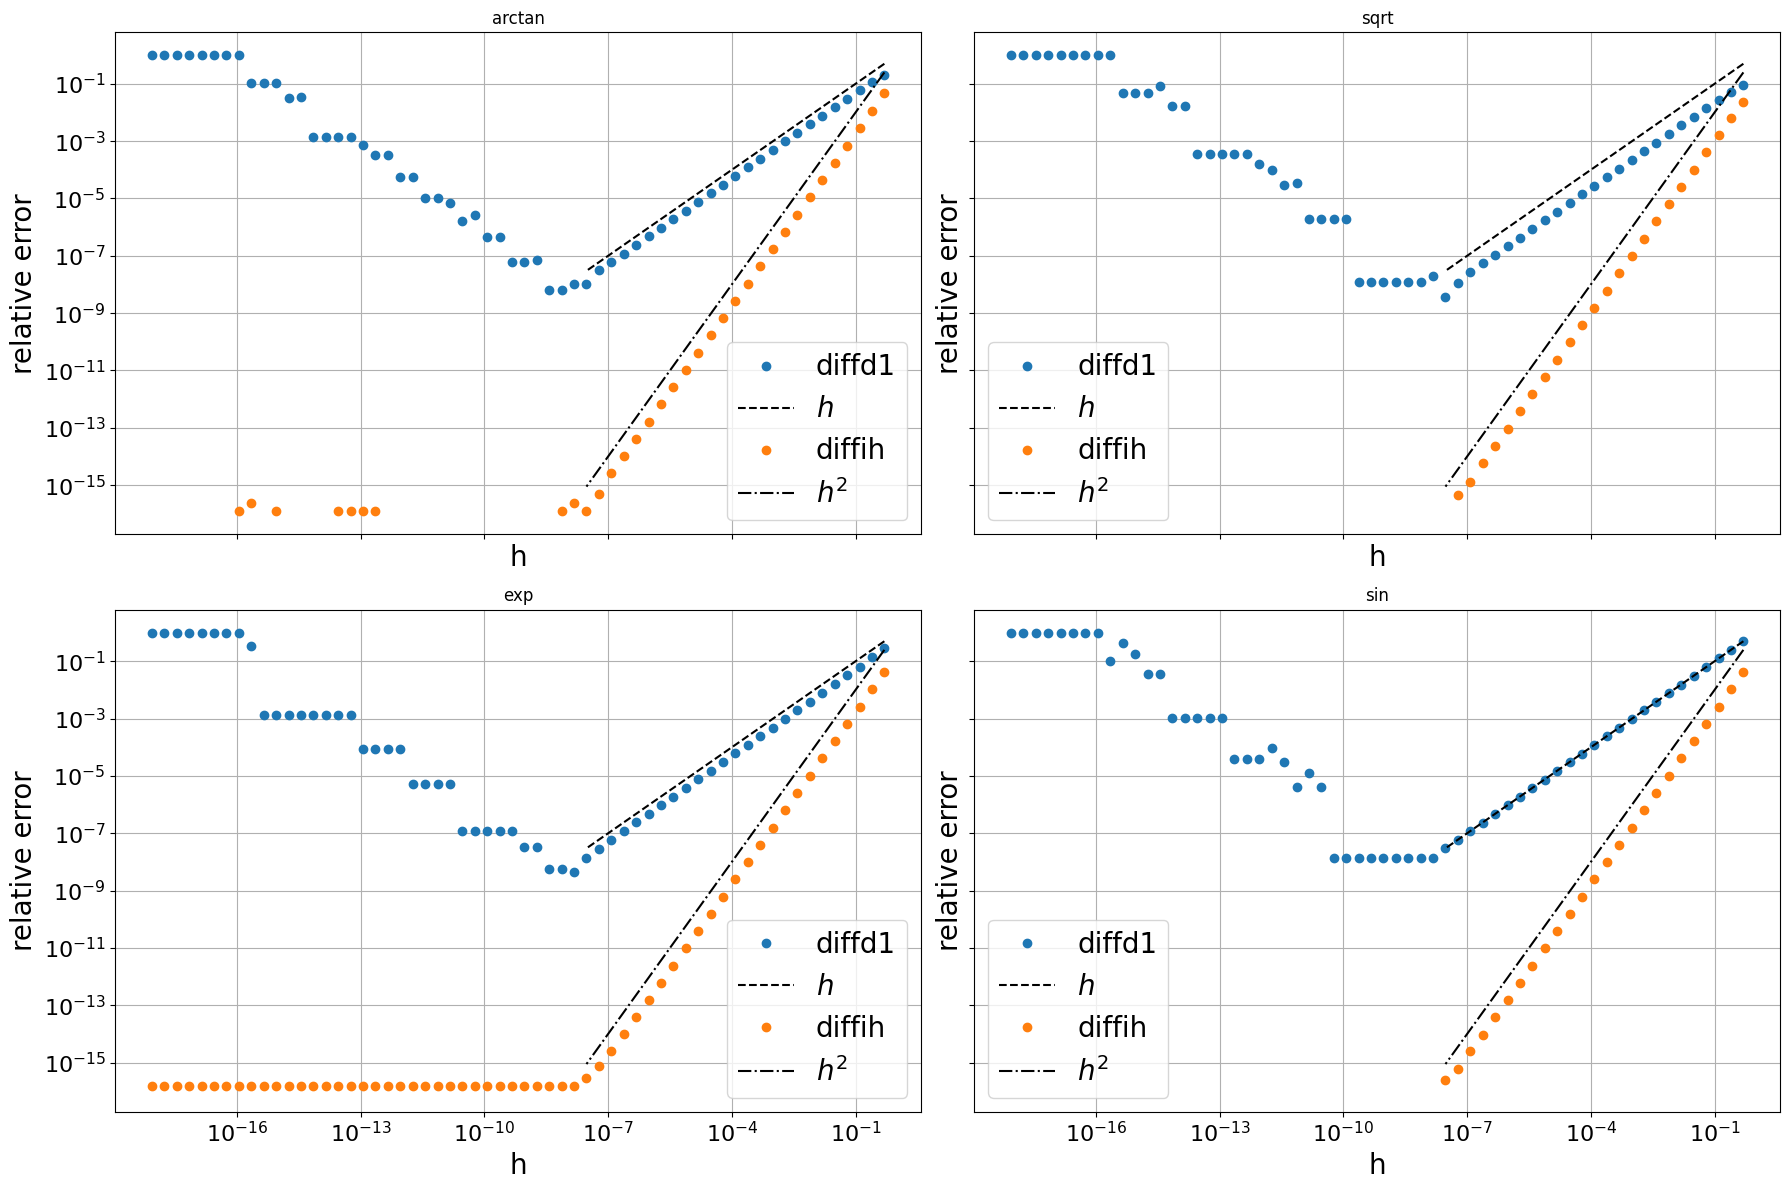

In [ ]:
%matplotlib inline
import numpy as np

# def of dv
def diffd1(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = ( f(x+h[0]) - f(x) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5
        y[k] = ( f(x+h[k]) - f(x) )/h[k]
    return y, h
    
# complex imaginary step
def diffih(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = np.imag( f(x+1.j*h[0]) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5 #h gets decreased by half each iteration
        y[k] = np.imag( f(x+1j*h[k]) )/h[k]
    return y, h

# printing routine
def prnt(pname,f,df,x,h0, ax):
    print(f.__name__)
    z,h = pname(f, x, h0)
    rerr = abs(z - df(x)) / df(x)
    ax.loglog(h,rerr, '.', label=pname.__name__)
    kt = 25
    if pname.__name__ == 'diffd1':
        ax.loglog(h[:kt], h[:kt], 'k--', label='$h$')
    else:
        ax.loglog(h[:kt], h[:kt]**2, 'k-.', label='$h^2$')
    print('Relativer Fehler:')
    print(  rerr )
    print('-----------')
    

x = 1.1 # where to evaluate
h0 = 0.5 # staring step

datan = lambda x: 1/(1+x**2)
dsqrt = lambda x: 0.5*x**-0.5
dcos = lambda x: -np.sin(x)

lof = [np.arctan, np.sqrt, np.exp, np.sin]#, np.cos]
lod = [datan, dsqrt, np.exp, np.cos]#, dcos]

from matplotlib import pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),
          #'text.fontsize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 16,
          'lines.markersize'  : 12,
          'ytick.labelsize': 16#,
          #'text.usetex': True
          }
plt.rcParams.update(params)


fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axsp = axs.flatten()
for f, df, ax in zip (lof,lod, axsp):
    print('diffd1')
    prnt(diffd1,f,df,x,h0,ax)
    print('diffih')
    prnt(diffih,f,df,x,h0,ax)
    ax.grid(True, which="both")
    ax.set_xlabel('h')
    ax.set_ylabel('relative error')
    ax.set_title(f.__name__)
    ax.legend()
    fig.tight_layout()

plt.show()



Richardson Acselleration